<a href="https://colab.research.google.com/github/ZulQaaidah/Tugas-Kelompok-2-SPK/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vjchoudhary7_customer_segmentation_tutorial_in_python_path = kagglehub.dataset_download('vjchoudhary7/customer-segmentation-tutorial-in-python')

print('Data source import complete.')


Data source import complete.


You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem 🏦
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# EDC

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,34,Male,18,33,92


In [21]:
df.shape

(200, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [24]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data analysis

In [25]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


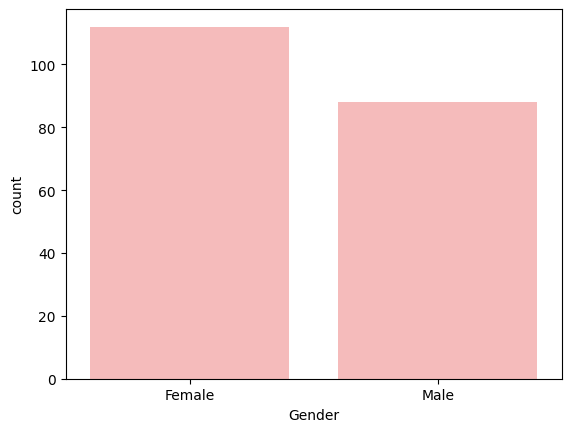

In [26]:
sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts(),color='red',alpha=.3)
plt.show()

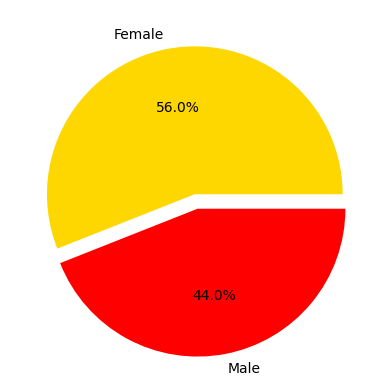

In [27]:
explode =[0,0.1]
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%',colors=['gold','r'],explode=explode)
plt.show()

In [28]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
df['Age']

,Age
0,19
1,21
2,20
3,23
4,31
...,...
195,35
196,45
197,32
198,32


In [30]:
pd.crosstab(df['Age'],df['Gender'])

Gender,Female,Male
Age,,
18,1,3
19,2,6
20,2,3
21,4,1
22,2,1
23,6,0
24,2,2
25,1,2
26,0,2


<Axes: xlabel='Age'>

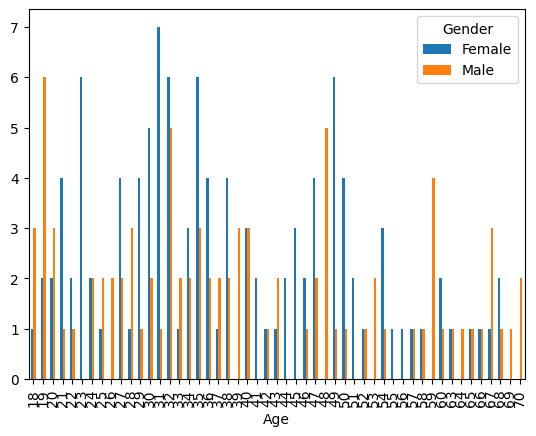

In [31]:
pd.crosstab(df['Age'],df['Gender']).plot(kind='bar')

In [32]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
pd.crosstab(df['Gender'],df['Annual Income (k$)'])

Annual Income (k$),15,16,17,18,19,20,21,23,24,25,...,93,97,98,99,101,103,113,120,126,137
Gender,,,,,,,,,,,,,,,,,,,,,
Female,0,2,2,2,2,2,1,1,0,1,...,0,2,1,1,1,4,1,2,1,0
Male,2,0,0,0,2,2,1,1,2,1,...,2,0,1,1,1,0,1,0,1,2


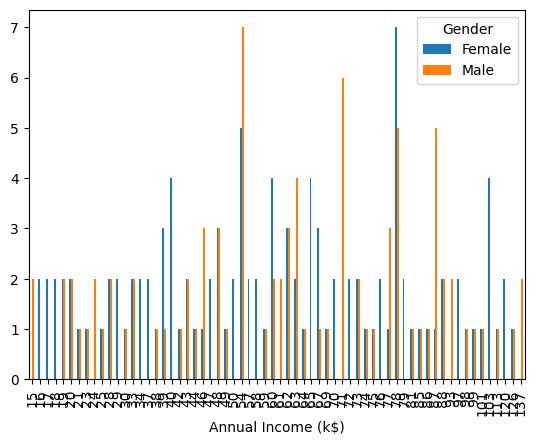

In [34]:


pd.crosstab(df['Annual Income (k$)'],df['Gender']).plot(kind='bar')
plt.show()


In [35]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [36]:
pd.crosstab(df['Age'],df['Annual Income (k$)'])

Annual Income (k$),15,16,17,18,19,20,21,23,24,25,...,93,97,98,99,101,103,113,120,126,137
Age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
crosstab = pd.crosstab(df['Age'], df['Annual Income (k$)'])

total_income_by_age = crosstab.dot(crosstab.columns)

highest_income_age_group = total_income_by_age.idxmax()
highest_income_amount = total_income_by_age.max()

print(f"The age group with the highest total income is {highest_income_age_group} with a total income of {highest_income_amount}k$.")


The age group with the highest total income is 32 with a total income of 959k$.


In [38]:
crosstab = pd.crosstab(df['Age'], df['Spending Score (1-100)'])

total_spending_by_age = crosstab.sum(axis=1)

highest_spending_age_group = total_spending_by_age.idxmax()
highest_spending_amount = total_spending_by_age.max()

print(f"The age group with the highest total spending score is {highest_spending_age_group} with a total spending score of {highest_spending_amount}.")

The age group with the highest total spending score is 32 with a total spending score of 11.


In [39]:
df[df['Age']==32]['Gender'].value_counts()

,count
Gender,
Female,6
Male,5


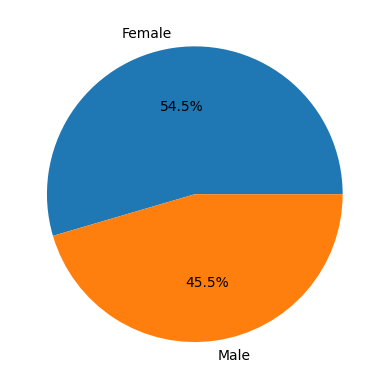

In [40]:
plt.pie(df[df['Age']==32]['Gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Spending Score (1-100)'>

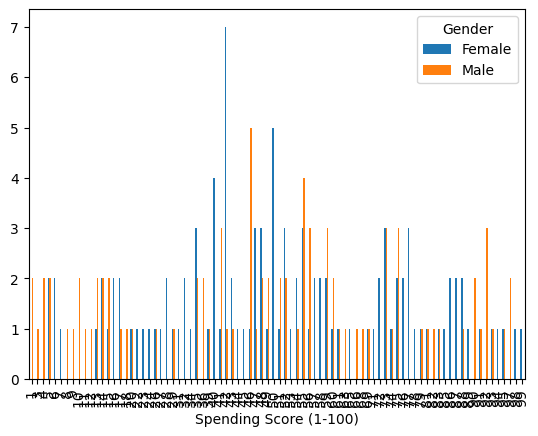

In [41]:
pd.crosstab(df['Spending Score (1-100)'],df['Gender']).plot(kind='bar')


In [42]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
crosstab = pd.crosstab(df['Gender'],df['Annual Income (k$)'],values=df['Spending Score (1-100)'],aggfunc='count')
total_counts = crosstab.sum(axis=1)

print("Total counts by Gender:")
print(total_counts)

if total_counts['Male'] > total_counts['Female']:
    print("Males are the most frequent.")
else:
    print("Females are the most frequent.")

Total counts by Gender:
Gender
Female    112.0
Male       88.0
dtype: float64
Females are the most frequent.


In [44]:
pd.crosstab([df['Age'],df['Annual Income (k$)']],df['Gender'])

Gender                  Female  Male
Age Annual Income (k$)              
18  33                       0     1
    48                       0     1
    59                       0     1
    65                       1     0
19  15                       0     1
...                        ...   ...
68  59                       1     0
    63                       0     1
69  44                       0     1
70  46                       0     1
    49                       0     1

[192 rows x 2 columns]

In [45]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
pd.crosstab(df['Annual Income (k$)'],df['Spending Score (1-100)'])

Spending Score (1-100),1,3,4,5,6,7,8,9,10,11,...,89,90,91,92,93,94,95,97,98,99
Annual Income (k$),,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

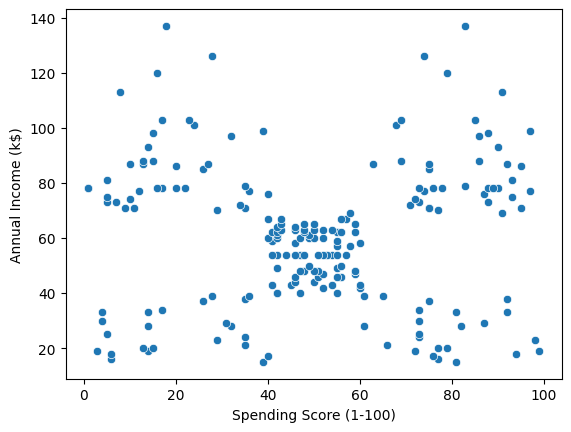

In [47]:
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

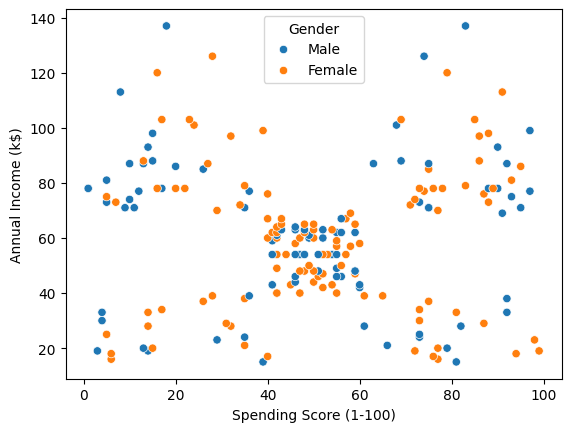

In [48]:
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender')

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

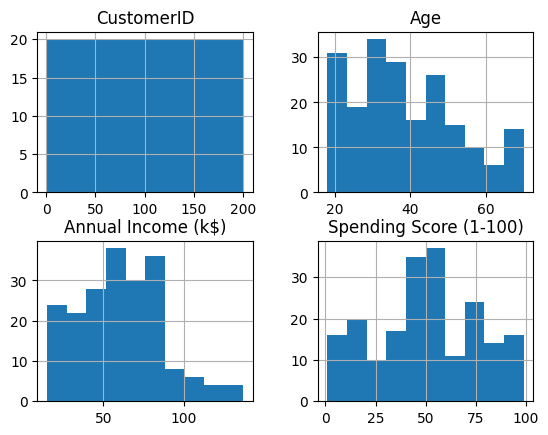

In [49]:
df.hist()

In [52]:
df['CustomerID'].nunique()

200

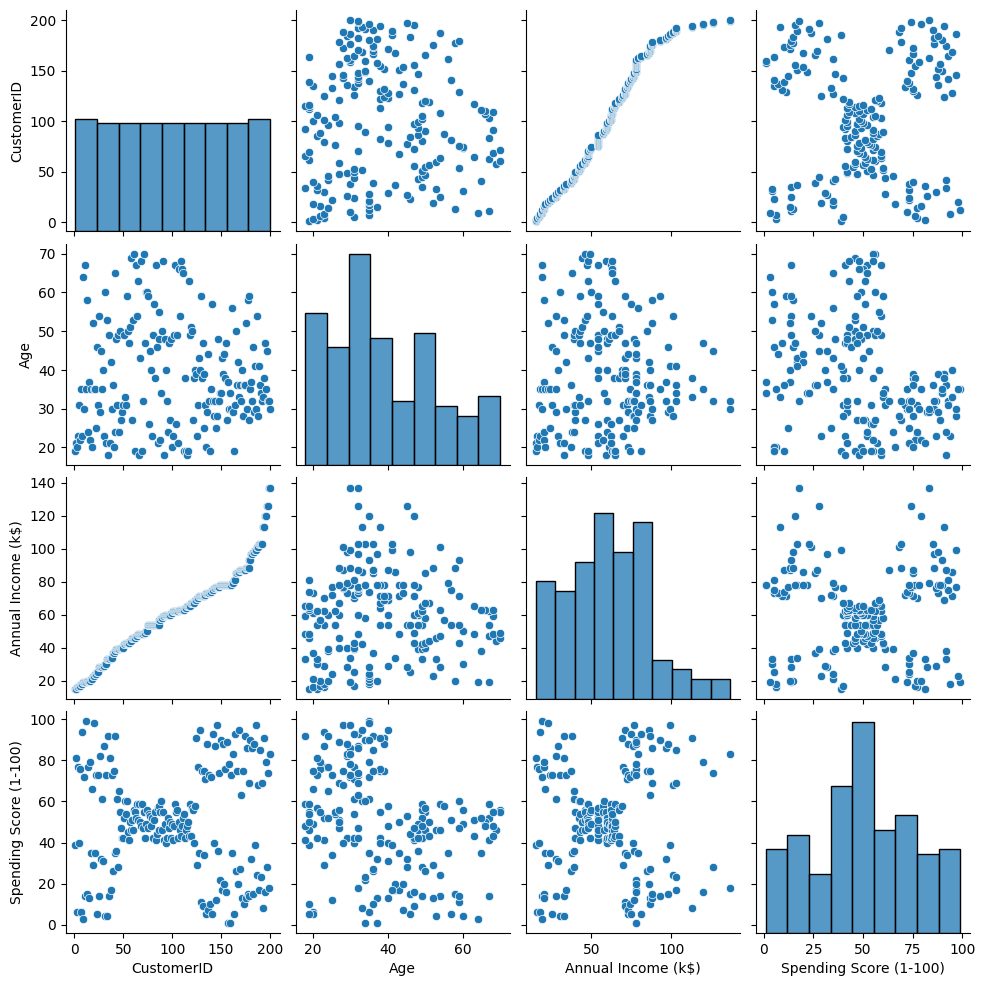

In [54]:
sns.pairplot(df)

In [55]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
df['Annual Income (k$)'].describe()

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


In [57]:
df['Spending Score (1-100)'].describe()

,Spending Score (1-100)
count,200.000000
mean,50.200000
std,25.823522
min,1.000000
25%,34.750000
50%,50.000000
75%,73.000000
max,99.000000


Data Analysis Report: Frequencies by Gender, Annual Income, and Spending Score
Introduction
This report presents an analysis of data🍅 to determine the frequency of occurrences based on gender, annual income, and spending score. The goal of # #this analysis is to identify which gender shows higher frequencies based on the given metrics.🍓: ======>
## ______Total Counts by Gender:_______________
## _____________Female: [112]____________
## _____________Male: [88]____________
## Conclusion: Based on the data, [females] show higher frequencies in the dataset.

## Based on the data, the age group with the highest total income is [32] with a total income of [959k$.] Thousands of dollars and a total spending score of 11